<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Q6 Comparing against PCA [Extra Credit](15 points)

**Note: We would recommend finishing Question 7 (pytorch) before attempting this question**

**Please include all the write up answers below to theory.ipynb. For the questions need code, you need to include the screenshot of code to theory.ipynb to get points.**

As a baseline for comparison, we will use one of the most popular methods for data dimensionality reduction - Principle Component Analysis (PCA). PCA allows one to find the best low-rank approximation of the data by keeping only a specified number of principle components. To perform PCA, we will use a factorization method called Singular Value Decomposition (SVD).

Run SVD on the training data. One of the matrices will be an orthonormal matrix that indicates the components of your data, sorted by their importances. Extract the first 32 principle components and form a projection matrix; you will need to figure out how to do these from the **U,S,V** matrices.

### Q6.1 (4 Points Code+WriteUp)
 
What is the size of your projection matrix? What is its rank?

This projection matrix was "trained" from our training data. Now let’s "test" it on our test data. Use the projection matrix on test data to obtain the reconstructed test images. Note that these reconstructions can also be represented with only 32 numbers.

**Hint**: [np.linalg.svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) could be useful for this question.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [1]:
import numpy as np
import scipy.io
from ipynb.fs.defs.q2 import *
import matplotlib.pyplot as plt

train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

# we don't need labels now!
train_x = train_data['train_data']
valid_x = valid_data['valid_data']

dim = 32

u, sig, v = np.linalg.svd(train_x)

pca = v.T[:, :32]

print(pca.shape)

(1024, 32)


### Q6.2 (4 Points Code+WriteUp)
 
Use the classes you selected in **Q5.3.1**, and for each of these 5 classes, include in your report 2 test images and their reconstruction. You may use test labels to help you find the corresponding classes. What differences do you observe that exist in the reconstructed test images, compared to the original ones? How do they compare to the ones reconstructed from your autoencoder?

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

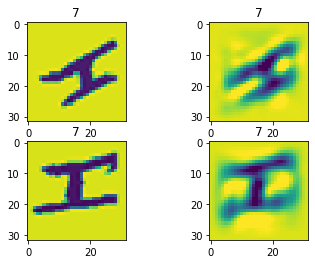

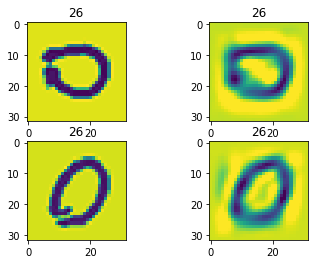

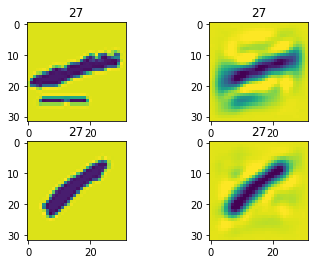

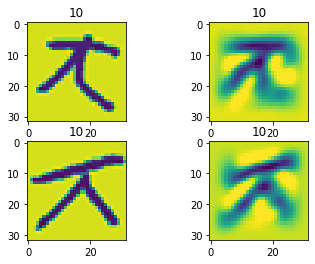

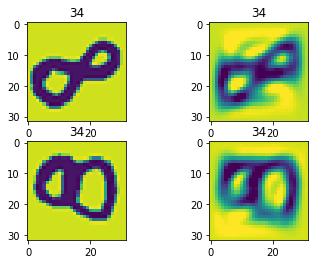

In [2]:
classes = [7, 26, 27, 10, 34]
valid_x = valid_data['valid_data']
valid_y = np.argmax(valid_data['valid_labels'], axis=1)

for i in range(len(classes)):
    image_idx = np.argwhere(valid_y == classes[i])[:2]
    fig, ax = plt.subplots(2, 2)
    
    out = np.clip(pca @ (pca.T @ valid_x[image_idx[0]].reshape(-1, 1)), 0, 1)
    
    ax[0][0].imshow(valid_x[image_idx[0]].reshape(32, 32))
    ax[0][0].set_title(str(classes[i]))    
    ax[0][1].imshow(out.reshape(32, 32))
    ax[0][1].set_title(str(classes[i]))
    
    out = np.clip(pca @ (pca.T @ valid_x[image_idx[1]].reshape(-1, 1)), 0, 1)
    
    ax[1][0].imshow(valid_x[image_idx[1]].reshape(32, 32))
    ax[1][0].set_title(str(classes[i]))
    ax[1][1].imshow(out.reshape(32, 32))
    ax[1][1].set_title(str(classes[i]))
    
    plt.show()

### Q6.3 (4 Points Code+WriteUp)
 
Report the average PSNR you get from PCA. Is it better than your autoencoder? Why?

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [4]:
from skimage.metrics import peak_signal_noise_ratio as psnr
# evaluate PSNR

valid_x = valid_data['valid_data']

total_psnr = 0.

for i in range(valid_x.shape[0]):
    
    out = np.clip(pca @ (pca.T @ valid_x[i].reshape(-1, 1)), 0, 1)  
    total_psnr += psnr(valid_x[i].reshape(1, -1), out.reshape(1, -1))

print('Mean PSNR - {}'.format(total_psnr / valid_x.shape[0]))

Mean PSNR - 16.54995414235679


### Q6.4 (3 Points Code+WriteUp)
 
Count the number of learned parameters for both your autoencoder and the PCA model. How many parameters do the respective approaches learn? Why is there such a difference in terms of performance?

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from ipynb.fs.defs.q2 import *
from collections import Counter

params = Counter()

np.random.seed(0)

# initialize layers here
initialize_weights(1024, 32, params, 'layer1')
initialize_weights(32, 32, params, 'layer2')
initialize_weights(32, 32, params, 'layer3')
initialize_weights(32, 1024, params, 'output')


total_params = 0

for k,v in params.items():
    if '_' in k: 
        continue
        
    total_params += v.size

print('Autoencoder - ', total_params)
print('PCA - ', 1024 * 32)

Autoencoder -  68704
PCA -  32768
